# Instalar Dependencias

In [1]:
#!pip install pandas xlrd scikit-learn #recomendo instalar as dependencias pelo terminal do anaconda

In [2]:
#!pip install graphviz

In [3]:
#!pip install dtreeviz

In [4]:
#!pip install seaborn

# Importar Pacotes e df

In [20]:
import numpy as np
import pandas as pd


from sklearn import tree,svm
from sklearn import neighbors

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

import matplotlib.pyplot as plt
import seaborn as sns 
import dtreeviz


In [6]:
df= pd.read_csv('koi_data.csv') #le a df

In [7]:
df

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,K08198.01,FALSE POSITIVE,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,K07984.01,FALSE POSITIVE,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,K07985.01,FALSE POSITIVE,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,K07987.01,FALSE POSITIVE,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


In [8]:
# Separa os dados

X = df.iloc[:,2 :-1]  # seleciona as colunas da terceira a ultima
y = df.iloc[:, 1] # seleciona a "resposta", ou seja, a classificacao do KOI


# Naive Bayes

In [9]:
#Avaliacao
nb = GaussianNB() # classificador Naive Bayes
kfold = KFold(n_splits=5, shuffle=True) # KFold com 5 folds e embaralhamento
scores_nb = cross_val_score(nb, X, y, cv=kfold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dados para treino e testes

#treinamento
nb.fit(X_train,y_train)
pred = nb.predict(X_test) 
#print(pred)

accuracy_nb = accuracy_score(y_test,pred) #accuracy
recall_nb = recall_score(y_test,pred,average = None) #recall
prec_nb = precision_score(y_test,pred,average = None) # precision


#Prints
print("NAIVE BAYES")
print(f"K-Fold Scores: {scores_nb}")
print(f"Média Cross-Validation K-Fold: {(scores_nb.mean())}")
print("Accuracy:", accuracy_nb)
print("Precision",prec_nb)
print("Recall:", recall_nb) 

NAIVE BAYES
K-Fold Scores: [0.82036503 0.79634966 0.79230769 0.78076923 0.78076923]
Média Cross-Validation K-Fold: 0.7941121702504987
Accuracy: 0.7800192122958693
Precision [0.65822785 0.96821516]
Recall: [0.96969697 0.64705882]


# Decision Tree

## Altura ilimitada

In [10]:
#Avaliacao
dt= DecisionTreeClassifier() #altura ilimitada
kfold = KFold(n_splits=5, shuffle=True) # KFold com 5 folds e embaralhamento
scores_dt = cross_val_score(dt, X, y, cv=kfold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dados para treino e testes

#treinamento
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test,pred) #accuracy
recall_dt = recall_score(y_test,pred,average = None) #recall
prec_dt = precision_score(y_test,pred,average = None) #precision


#Prints
print("DECISION TREE")
print(f"K-Fold Scores: {scores_dt}")
print(f"Média Cross-Validation K-Fold: {scores_dt.mean()}")
print("Accuracy:", accuracy_dt)
print("Precision",prec_dt)
print("Recall:", recall_dt) 

DECISION TREE
K-Fold Scores: [0.94236311 0.95196926 0.95384615 0.94230769 0.93653846]
Média Cross-Validation K-Fold: 0.9454049360821696
Accuracy: 0.9423631123919308
Precision [0.93006993 0.95098039]
Recall: [0.93006993 0.95098039]


### Plota Arvore

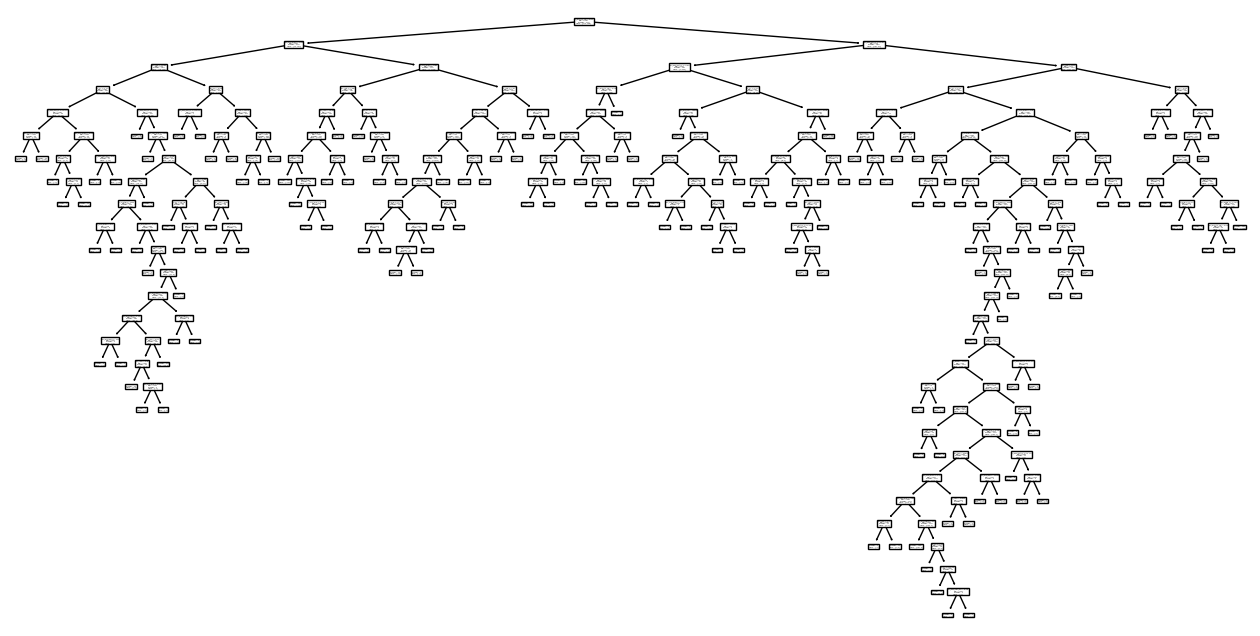

In [11]:
#Plotar Arvore
tree = plt.figure(figsize=(16,8))
plot_tree(dt,feature_names = X.columns)
plt.show()

## Altura Limitada


In [12]:
#Avaliacao
#quanto menor o valor da altura da arvore pior sao os resultados
max_depth_tree = 3 #altura arvore MUDAR LIMITE AQUI
dt= DecisionTreeClassifier(max_depth = max_depth_tree ) #altura limitada
kfold = KFold(n_splits=5, shuffle=True) # KFold com 5 folds e embaralhamento
scores_dt_lim = cross_val_score(dt, X, y, cv=kfold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dados para treino e testes

#treinamento
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test,pred) #accuracy
recall_dt = recall_score(y_test,pred,average = None) #recall
prec_dt = precision_score(y_test,pred,average = None) #precision


#Prints
print(f"DECISION TREE COM ALTURA {max_depth_tree}")
print(f"K-Fold Scores: {scores_dt_lim}")
print(f"Média Cross-Validation K-Fold: {scores_dt_lim.mean()}")
print("Accuracy:", accuracy_dt)
print("Precision",prec_dt)
print("Recall:", recall_dt) 


DECISION TREE COM ALTURA 3
K-Fold Scores: [0.93659942 0.91450528 0.92884615 0.92115385 0.92980769]
Média Cross-Validation K-Fold: 0.926182479864036
Accuracy: 0.9212295869356388
Precision [0.87964989 0.95376712]
Recall: [0.93706294 0.91013072]


## Plota Arvore

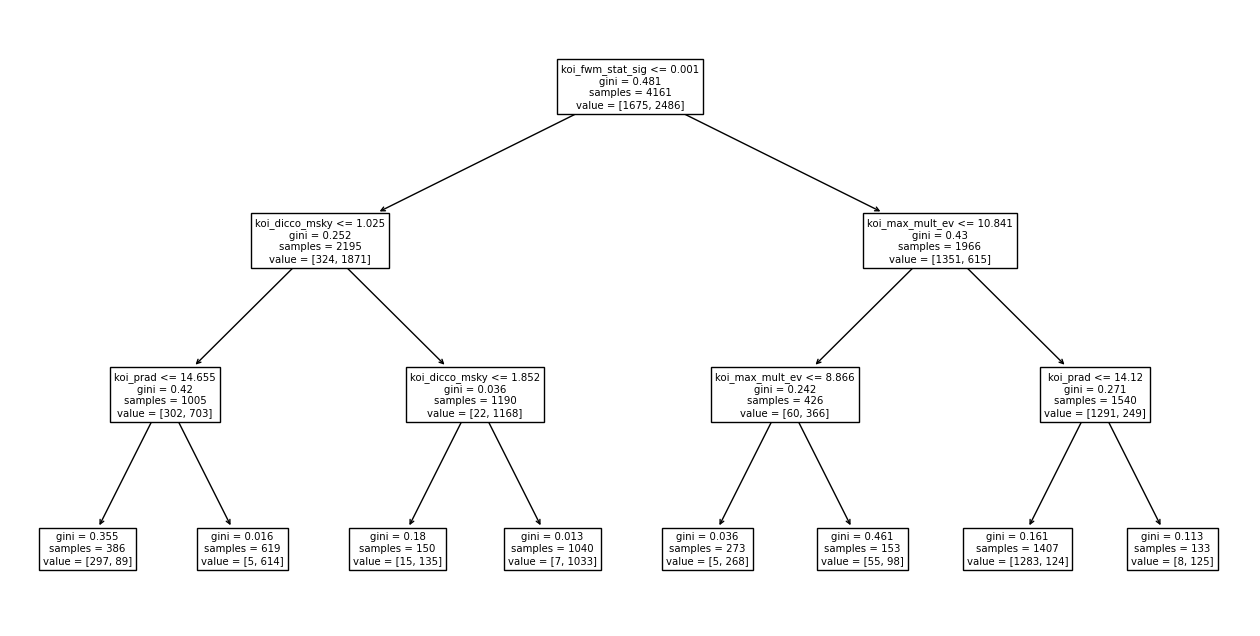

In [13]:
#Plotar arvore
tree = plt.figure(figsize=(16,8))
plot_tree(dt,feature_names = X.columns)
plt.show()

# SVM

In [14]:
#Avaliacao
kfold = KFold(n_splits=5, shuffle=True) # KFold com 5 folds e embaralhamento
svm_linear = svm.SVC(kernel='linear')
svm_RBF = svm.SVC(kernel = 'rbf')
scores_linear = cross_val_score(svm_linear, X, y, cv=kfold)
scores_RBF = cross_val_score(svm_RBF, X, y, cv=kfold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dados para treino e testes

#treinamento
svm_linear.fit(X_train, y_train)
svm_RBF.fit(X_train,y_train)
#predict
pred_linear = svm_linear.predict(X_test)
pred_RBF = svm_RBF.predict(X_test)


#linear
accuracy_svm_linear = accuracy_score(y_test,pred_linear) #accuracy
recall_svm_linear = recall_score(y_test,pred_linear,average = None) #recall
prec_svm_linear = precision_score(y_test,pred_linear,average = None) # precision
#RBF
accuracy_svm_RBF = accuracy_score(y_test,pred_RBF) #accuracy
recall_svm_RBF = recall_score(y_test,pred_RBF,average = None) #recall
prec_svm_RBF = precision_score(y_test,pred_RBF,average = None) # precision


#Prints
#linear
print("SVM LINEAR")
print(f"K-Fold Scores: {scores_linear}")
print(f"Média Cross-Validation K-Fold: {(scores_linear.mean())}")
print("Accuracy:", accuracy_svm_linear)
print("Precision",prec_svm_linear)
print("Recall:", recall_svm_linear)
#RBF
print("")
print("SVM RBF")
print(f"K-Fold Scores: {scores_RBF}")
print(f"Média Cross-Validation K-Fold: {(scores_RBF.mean())}")
print("Accuracy:", accuracy_svm_RBF)
print("Precision",prec_svm_RBF)
print("Recall:", recall_svm_RBF) 





SVM LINEAR
K-Fold Scores: [0.94620557 0.93563881 0.93365385 0.92788462 0.93461538]
Média Cross-Validation K-Fold: 0.9355996453114608
Accuracy: 0.9414024975984631
Precision [0.92592593 0.95238095]
Recall: [0.93240093 0.94771242]

SVM RBF
K-Fold Scores: [0.69356388 0.68299712 0.68269231 0.66442308 0.68365385]
Média Cross-Validation K-Fold: 0.6814660459617232
Accuracy: 0.6926032660902978
Precision [0.57752489 0.93195266]
Recall: [0.94638695 0.51470588]


# KNN

In [15]:
#Avaliacao
kfold = KFold(n_splits=5, shuffle=True) # KFold com 5 folds e embaralhamento
k_neighbords = 30 # K
knn = neighbors.KNeighborsClassifier(n_neighbors=k_neighbords)
scores_knn = cross_val_score(knn, X, y, cv=kfold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dados para treino e testes

#treinamento
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test,pred) #accuracy
recall_knn = recall_score(y_test,pred,average = None) #recall
prec_knn = precision_score(y_test,pred,average = None) #precision

#Prints
print(f"KNN com k={k_neighbords}")
print(f"K-Fold Scores: {scores_knn}")
print(f"Média Cross-Validation K-Fold: {scores_knn.mean()}")
print("Accuracy:", accuracy_knn)
print("Precision",prec_knn)
print("Recall:", recall_knn) 


KNN com k=30
K-Fold Scores: [0.75792507 0.77425552 0.80961538 0.78269231 0.79326923]
Média Cross-Validation K-Fold: 0.783551503731619
Accuracy: 0.7800192122958693
Precision [0.69230769 0.86756238]
Recall: [0.83916084 0.73856209]


## Plota Grafico

Grafico KNM com k=1 a k=70
Best Score = 0.7920015887090815 with k = 15


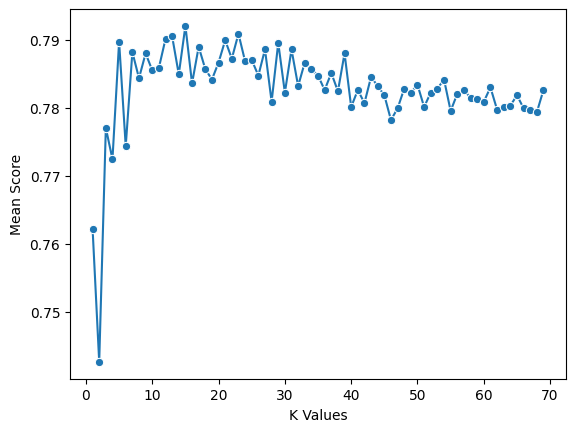

In [16]:
#Variaveis para o test
k_values = [i for i in range (1,70)] #testaremos de k=1 ate k=70
scores_knn_graph = []
max_k = 0

#Aqui realizamos os testes com todos os k's
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    score_knn_k = cross_val_score(knn, X, y, cv= kfold)
    scores_knn_graph.append(np.mean(score_knn_k)) 
    
    if(score_knn_k.mean() >= max_k): #Salvamos o maior score obtido por um k qualquer
        best_k = k
        max_k = score_knn_k.mean()

# Prints
print("Grafico KNM com k=1 a k=70")
sns.lineplot(x = k_values, y = scores_knn_graph, marker='o')
plt.xlabel("K Values")
plt.ylabel("Mean Score")

print(f"Best Score = {max_k} with k = {best_k}")

# Random Forest

In [17]:
#Avaliacao
kfold = KFold(n_splits=5, shuffle=True) # KFold com 5 folds e embaralhamento
n_trees = 30 #numero de arvores
max_d = None #Profundidade maxima na arvore (se for None nao havera limite)
rfc =RandomForestClassifier(n_estimators = n_trees, max_depth = max_d)
scores_rfc = cross_val_score(rfc, X, y, cv=kfold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dados para treino e testes

#treinamento
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test,pred) #accuracy
recall_rfc = recall_score(y_test,pred,average = None) #recall
prec_rfc = precision_score(y_test,pred,average = None) #precision

#Prints
print(f"RANDOM FOREST WITH {n_trees} TREES AND DEPTH = {max_d}")
print(f"K-Fold Scores: {scores_rfc}")
print(f"Média Cross-Validation K-Fold: {scores_rfc.mean()}")
print("Accuracy:", accuracy_rfc)
print("Precision",prec_rfc)
print("Recall:", recall_rfc) 


RANDOM FOREST WITH 30 TREES AND DEPTH = None
K-Fold Scores: [0.96926033 0.97502402 0.96634615 0.95480769 0.9625    ]
Média Cross-Validation K-Fold: 0.9655876376265425
Accuracy: 0.9615754082612872
Precision [0.96199525 0.96129032]
Recall: [0.94405594 0.97385621]


## Plota Grafico

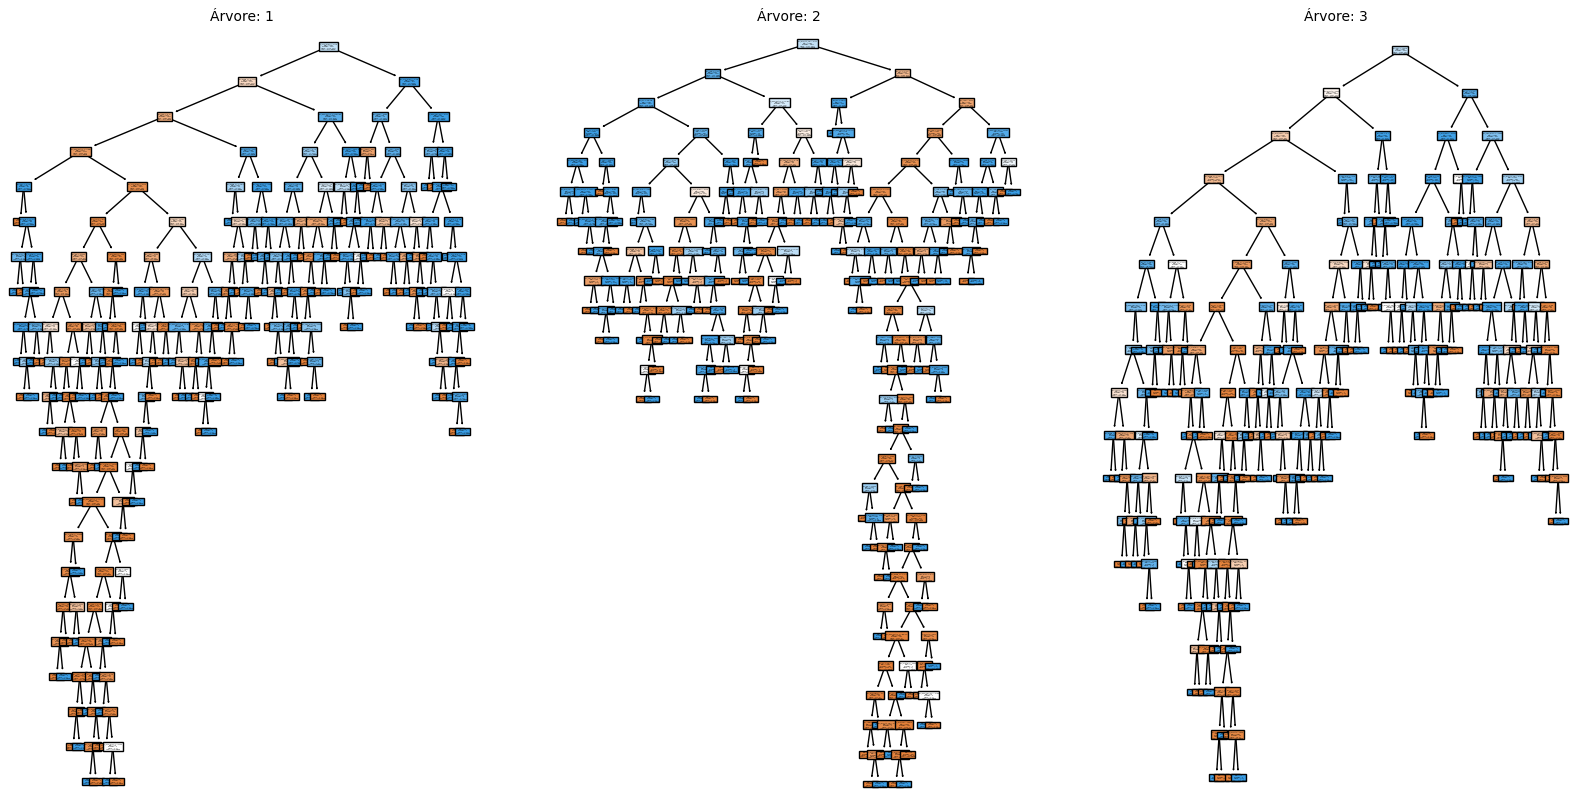

In [21]:
num_arvores = 3
fig, axes = plt.subplots(nrows=1, ncols=num_arvores, figsize=(20, 10))

for index in range(num_arvores):
    arvore = rfc.estimators_[index]
    
    tree.plot_tree(arvore,
                   feature_names=X.columns,
                   class_names=y,
                   filled=True,
                   ax=axes[index])
    
    axes[index].set_title('Árvore: ' + str(index+1), fontsize=10)

fig.savefig('rfc_arvores.png')

# Gradient Tree Boosting

In [22]:
#Avaliacao
kfold = KFold(n_splits=5, shuffle=True) # KFold com 5 folds e embaralhamento
n_i = 100 #numero de iteracoes
gbc =GradientBoostingClassifier(n_estimators=n_i)
scores_gbc = cross_val_score(gbc, X, y, cv=kfold)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dados para treino e testes

#treinamento
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_test,pred) #accuracy
recall_gbc = recall_score(y_test,pred,average = None) #recall
prec_gbc = precision_score(y_test,pred,average = None) #precision

#Prints
print(f"GRADIENT TREE BOOSTING WITH {n_i} ITERATIONS")
print(f"K-Fold Scores: {scores_gbc}")
print(f"Média Cross-Validation K-Fold: {scores_gbc.mean()}")
print("Accuracy:", accuracy_gbc)
print("Precision",prec_gbc)
print("Recall:", recall_gbc) 

GRADIENT TREE BOOSTING WITH 100 ITERATIONS
K-Fold Scores: [0.96926033 0.96157541 0.96634615 0.97403846 0.96634615]
Média Cross-Validation K-Fold: 0.9675133008202172
Accuracy: 0.9673390970220941
Precision [0.96252927 0.97068404]
Recall: [0.95804196 0.97385621]


## Plota Grafico

Grafico GBC com i=1 a i=70
Best Score = 0.9644348998743812 with i = 39


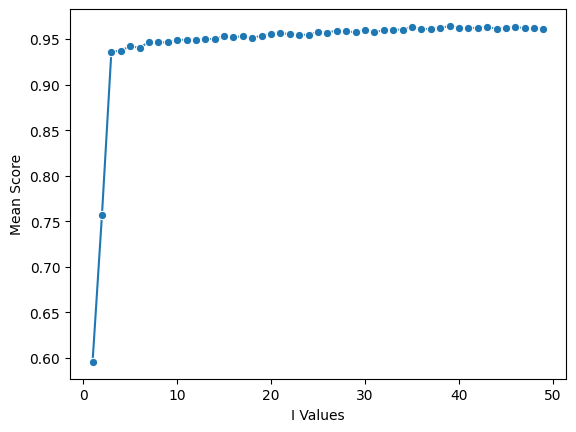

In [23]:
#Variaveis para o test
i_values = [i for i in range (1,50)] #testaremos de i=1 ate i=50 quanto maior o intervalo mais demorado sera
scores_gbc_graph = []
max_i = 0

#Aqui realizamos os testes com todos os k's
for i in i_values:
    gbc =GradientBoostingClassifier(n_estimators= i)
    score_gbc_i = cross_val_score(gbc, X, y, cv= kfold)
    scores_gbc_graph.append(np.mean(score_gbc_i)) 
    
    if(score_gbc_i.mean() >= max_i): #Salvamos o maior score obtido por um k qualquer
        best_i = i
        max_i = score_gbc_i.mean()

# Prints
print("Grafico GBC com i=1 a i=50")
sns.lineplot(x = i_values, y = scores_gbc_graph, marker='o')
plt.xlabel("I Values")
plt.ylabel("Mean Score")

print(f"Best Score = {max_i} with i = {best_i}")

# Comparacao Resultados

In [24]:

kfold = KFold(n_splits = 5,shuffle = True)

# Todos os Modelos
nb = GaussianNB()
knn = neighbors.KNeighborsClassifier()
rfc =RandomForestClassifier()
dt = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
svm_linear = svm.SVC(kernel='linear')
svm_RBF = svm.SVC(kernel = 'rbf')

#cross_val_score de todos os modelos 
#OBS: Se ja rodou cada um dos metodos acima nao é necessario fazer o cross_val_score novamente

# scores_nb = cross_val_score(nb, X, y, cv=kfold)
# scores_knn = cross_val_score(knn, X, y, cv=kfold)
# scores_rfc = cross_val_score(rfc, X, y, cv=kfold)
# scores_dt = cross_val_score(dt, X, y, cv=kfold)
# scores_gbc = cross_val_score(gbc, X, y, cv=kfold)
# scores_linear = cross_val_score(svm_linear, X, y, cv=kfold)
# scores_RBF = cross_val_score(svm_RBF, X, y, cv=kfold)

#Prints
print("Media Score")
print(f"Naive Bayes: {scores_nb.mean()}\nDecision Tree: {scores_dt.mean()}\nSVM Linear: {scores_linear.mean()}\nSVM RBF: {scores_RBF.mean()}")
print(f"KNN: {scores_knn.mean()}\nRandom Forest: {scores_rfc.mean()}\nGradient Tree Boosting: {scores_gbc.mean()}")
print("\n")

#Prints precision e recall
print("{:<15s}| {:<23s}| {:<9s}".format("Método", "Recall", "Precision"))
print("{:<15s}| {:<8s}| {:<9s}".format("Naive Bayes", str(recall_nb), str(prec_nb)))
print("{:<15s}| {:<8s}| {:<9s}".format("Decision Tree", str(recall_dt), str(prec_dt)))
print("{:<15s}| {:<8s}| {:<9s}".format("SVM Linear", str(recall_svm_linear), str(prec_svm_linear)))
print("{:<15s}| {:<8s}| {:<9s}".format("SVM RBF", str(recall_svm_RBF), str(prec_svm_RBF)))
print("{:<15s}| {:<8s}| {:<9s}".format("KNN", str(recall_knn), str(prec_knn)))
print("{:<15s}| {:<8s}| {:<9s}".format("Random Forest", str(recall_rfc), str(prec_rfc)))
print("{:<15s}| {:<8s}| {:<9s}".format("Gradient Tree", str(recall_gbc), str(prec_gbc)))
print("\n")

#Melhor Modelo
#dicionario usado para printar nome melhor modelo
dic = {
    "NaiveBayes": scores_nb.mean(),
    "DecisionTree": scores_dt.mean(),
    "SVM_Linear": scores_linear.mean(),
    "SVM_RBF": scores_RBF.mean(),
    "RandomForest": scores_rfc.mean(),
    "GradientTree": scores_gbc.mean(),
    "Knn": scores_knn.mean(),
}

best_model = max(dic, key=dic.get)
print(f"O melhor modelo foi {best_model} com score {dic[best_model]}")

Media Score
Naive Bayes: 0.7941121702504987
Decision Tree: 0.9454049360821696
SVM Linear: 0.9355996453114608
SVM RBF: 0.6814660459617232
KNN: 0.783551503731619
Random Forest: 0.9655876376265425
Gradient Tree Boosting: 0.9675133008202172


Método         | Recall                 | Precision
Naive Bayes    | [0.96969697 0.64705882]| [0.65822785 0.96821516]
Decision Tree  | [0.93706294 0.91013072]| [0.87964989 0.95376712]
SVM Linear     | [0.93240093 0.94771242]| [0.92592593 0.95238095]
SVM RBF        | [0.94638695 0.51470588]| [0.57752489 0.93195266]
KNN            | [0.83916084 0.73856209]| [0.69230769 0.86756238]
Random Forest  | [0.94405594 0.97385621]| [0.96199525 0.96129032]
Gradient Tree  | [0.95804196 0.97385621]| [0.96252927 0.97068404]


O melhor modelo foi GradientTree com score 0.9675133008202172
